In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [156]:
df = pd.read_csv("breast-cancer.csv")

In [157]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [159]:
le = LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis'] = le.transform(df['diagnosis'])

In [160]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [161]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['id','diagnosis'],axis=1),
                                                 df['diagnosis'],test_size=0.10)

In [162]:
def sigmoid(x): # Sigmoid activation function : σ(x) = 1/(1+exp(-x))
    if x >= 0.0:
        return 1 / (1 + np.exp(-x))
    else:
        return np.exp(x) / (1 + np.exp(x))

def relu(x): # ReLU activation function : f(x) = max(0,x)
    return np.maximum(0, x)

def my_predict(x,weight):
    x = np.array(x)
    result = x
    for i in range(0,len(weight), 2):
        result = relu(result)
        result = np.dot(result, weight[i]) + weight[i+1]
        
    sigmoid_v = np.vectorize(sigmoid)
    result = sigmoid_v(result)

    return result.flatten()

def log_loss(y_true, y_pred): # Binary Cross Entropy Loss : log_loss(y_true,y_pre) = — (1/N) * ∑(Y_true * log(Y_pred))
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)


In [163]:
def train(x,y,epochs=10000,lr=0.01):

    try:x = np.array(x.to_numpy())
    except:x = np.array(x)

    try:y = np.array(y.to_numpy())
    except:y = np.array(y)

    w = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    b = np.random.rand(1)
    n = len(y)
    final_weight = np.random.rand(1,x.shape[1]).reshape(x.shape[1],1)
    previous_loss = 1000.0
    for _ in range(epochs):
        # Forward Propagation
        weight = [w,b]
        predict = my_predict(x,weight) # Y_pred = σ(X.W + b)
        loss = log_loss(y, predict) # Loss = log_loss(Y_true,Y_pred)

        # Backward Propagation
        for j in range(x.shape[1]):
            derivative_of_w = (1/n)*np.dot(np.transpose(x)[j],(predict-y)) # ∂L/∂w = (1/N) * ∑(X * (Y_pred - Y_true))
            w[j][0] = w[j][0] - lr * derivative_of_w # w = w - lr * ∂L/∂w

        b[0] = b[0] - lr * np.mean(predict-y) # b = b - lr * ∂L/∂b

        print(f'Epoche : {_}, loss : {loss}')

        #Call back
        if loss < previous_loss:
            previous_loss = loss
            final_weight = weight

    return final_weight

In [164]:
weight = train(x_train,y_train,epochs=5000,lr=1)

Epoche : 0, loss : 21.519774885853007
Epoche : 1, loss : 13.019499695737817
Epoche : 2, loss : 21.519774885853007
Epoche : 3, loss : 13.019499695737817
Epoche : 4, loss : 21.519774885853007
Epoche : 5, loss : 13.019499695737817
Epoche : 6, loss : 21.519774885853007
Epoche : 7, loss : 21.519774885853007
Epoche : 8, loss : 13.019499695737817
Epoche : 9, loss : 21.519774885853007
Epoche : 10, loss : 13.019499695737817
Epoche : 11, loss : 21.519774885853007
Epoche : 12, loss : 21.519774885853007
Epoche : 13, loss : 13.019499695737817
Epoche : 14, loss : 21.519774885853007
Epoche : 15, loss : 13.019499695737817
Epoche : 16, loss : 21.519774885853007
Epoche : 17, loss : 19.04023456625469
Epoche : 18, loss : 13.019499695737817
Epoche : 19, loss : 21.519774885853007
Epoche : 20, loss : 13.019499695737817
Epoche : 21, loss : 21.519774885853007
Epoche : 22, loss : 8.63487369580696
Epoche : 23, loss : 12.884582600445196
Epoche : 24, loss : 21.519774885853007
Epoche : 25, loss : 20.03565091821838


Epoche : 114, loss : 9.916406504007558
Epoche : 115, loss : 21.182474339052803
Epoche : 116, loss : 9.579113765776011
Epoche : 117, loss : 20.980094010972678
Epoche : 118, loss : 9.916406504007558
Epoche : 119, loss : 21.182474339052803
Epoche : 120, loss : 9.579113765776011
Epoche : 121, loss : 20.77771368289256
Epoche : 122, loss : 9.714030861068629
Epoche : 123, loss : 20.71025357353252
Epoche : 124, loss : 9.579113765776011
Epoche : 125, loss : 20.238032808012232
Epoche : 126, loss : 9.579113765776011
Epoche : 127, loss : 20.10311258929215
Epoche : 128, loss : 9.376738122837079
Epoche : 129, loss : 19.765812042491948
Epoche : 130, loss : 9.714030861068629
Epoche : 131, loss : 19.900732261212028
Epoche : 132, loss : 8.971986836959221
Epoche : 133, loss : 18.55152851229748
Epoche : 134, loss : 9.5116552181297
Epoche : 135, loss : 19.698350371418176
Epoche : 136, loss : 9.376738122837079
Epoche : 137, loss : 19.29358971525793
Epoche : 138, loss : 9.30927957519077
Epoche : 139, loss : 

In [165]:
predict = np.where(my_predict(x_test,weight) >= 0.5, 1, 0)

In [166]:
accuracy_score(y_test, predict)

0.9298245614035088

In [167]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.94      0.84      0.89        19

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



<Axes: >

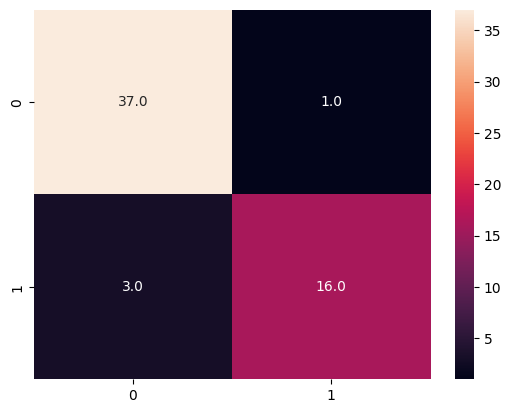

In [168]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".1f")